In [218]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [219]:
def pdf(x, y):
    return stats.multivariate_normal.pdf((x, y),
                                          mean=[0, 0],
                                          cov=[[10, 8], [8, 10]]
                                         )

In [220]:
grid = np.mgrid[-5:5:0.05, -5:5:0.05] 
density = np.array([[pdf(grid[0, i, j], grid[1, i, j])
                       for i in range(grid[0].shape[0])]
                       for j in range(grid[0].shape[1])])  #плотность распределения

In [221]:
def draw_density_plot(grid, density, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')  # закрашивание области
    plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
    plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    CS = plt.contour(grid[0], grid[1], density, [0.004, 0.01, 0.02, 0.025])  # нарисовать указанные линии уровня
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    plt.xlim((np.min(grid[0]), np.max(grid[0])))
    plt.ylim((np.min(grid[1]), np.max(grid[1])))
    
    plt.show()

# Построим график плотности для $N(a, \Sigma)$

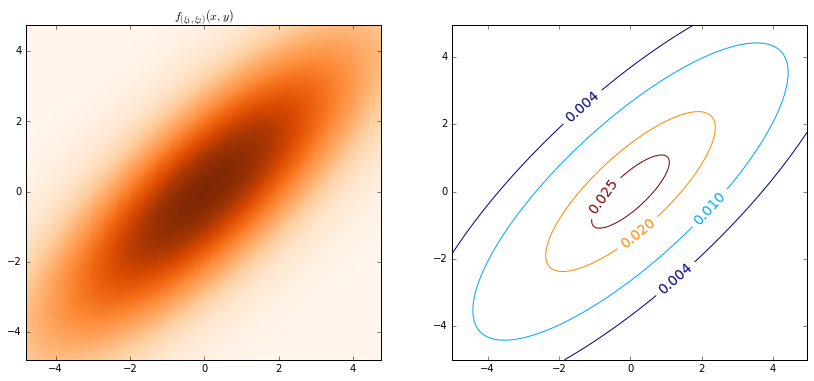

In [222]:
draw_density_plot(grid, density, r'$f_{(\xi_1, \xi_2)}(x, y)$')

#### Вычислим условную плотность по формуле $f_{(\xi_1|\xi_2)}(x|y)=\frac{f_{(\xi_1, \xi_2)}(x, y)}{f_{\xi_2}(y)}$, где плотность $f_{\xi_2}(y)$ найдем с помощью взятия интеграла от совместной плотности:

In [246]:
def density_of_comp(pdf, y):
    return integrate.quad(lambda x: pdf(x, y), -np.inf, np.inf)[0]  #Интегрирование совместной плотности по x

In [263]:
def density_of_1_comp(pdf, x):
    return integrate.quad(lambda y: pdf(x, y), -np.inf, np.inf)[0]  #Интегрирование совместной плотности по y

In [247]:
ys = [-3.0, 0.0, 1.0, 5.0]
comp_densities = [density_of_comp(pdf, y) for y in ys]

In [248]:
grid_for_conditional_density = np.arange(-8, 15, 0.05)
cond_density = [[pdf(x, ys[i]) / comp_densities[i]
                 for x in grid_for_conditional_density]
                 for i in range(len(ys))]

#### Наконец, нарисуем графики $f_{(\xi_1|\xi_2)}(x|y)$ для нужных нам y

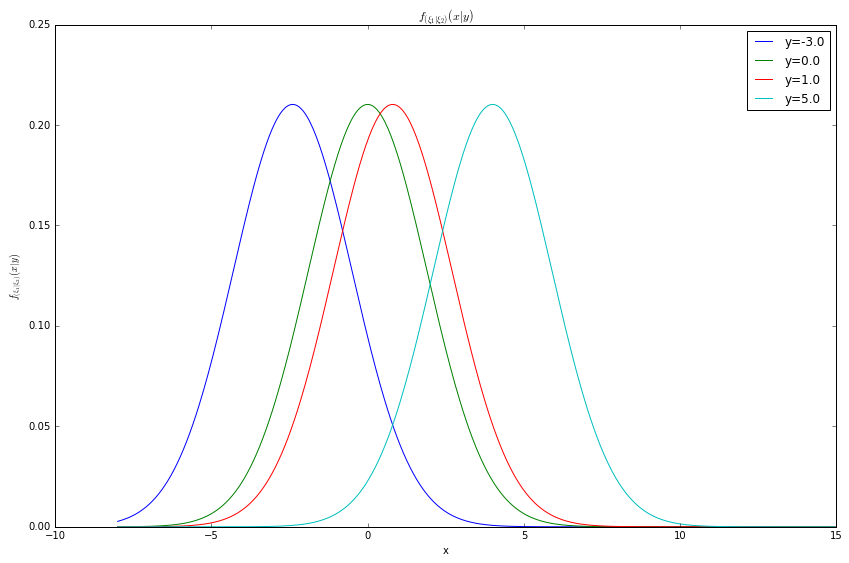

In [253]:
plt.figure(figsize=(14, 9))
for i in range(len(ys)):
    plt.plot(grid_for_conditional_density, cond_density[i], label='y={:}'.format(ys[i]))
plt.legend(loc='best')
plt.ylabel(r'$f_{(\xi_1|\xi_2)}(x|y)$')
plt.xlabel(r'x')
plt.title(r'$f_{(\xi_1|\xi_2)}(x|y)$')
plt.show()

In [254]:
def cond_expectation_xi_xi_2(y):  #Посчитаем условное мат. ожидание с помощью интегрирования
    return integrate.quad(lambda x: x * pdf(x, y) / density_of_comp(pdf, y), -np.inf, np.inf)[0]

In [264]:
def expectation_xi():  #и мат. ожидание $\xi$
    return integrate.quad(lambda x: x * density_of_1_comp(pdf, x), -np.inf, np.inf)[0]

In [255]:
grid_for_expectation = (-3, 5, 0.5)

In [256]:
expectations = [cond_expectation_xi_xi_2(y) for y in grid_for_expectation]

In [267]:
expectation_of_xi = expectation_xi()

Получим график

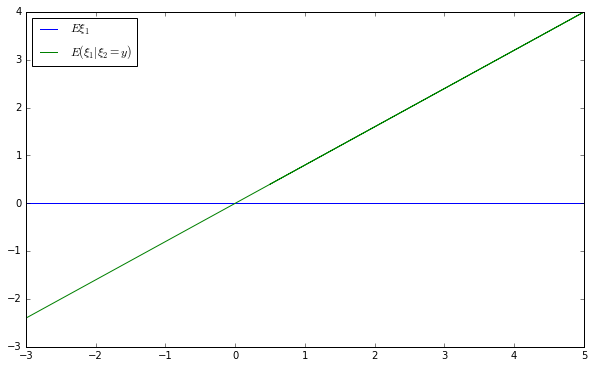

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(grid_for_expectation, [expectation_of_xi for i in grid_for_expectation], label=r'$E\xi_{1}$')
plt.plot(grid_for_expectation, expectations, label=r'$E(\xi_{1} | \xi_{2}=y)$')
plt.legend(loc='best')
plt.show()

Наблюдаем, что условное мат. ожидание $E(\xi_{1} | \xi_{2}=y)$ - линейная функция от y. Причем это полностью согласуется с теоретическими знаниями: если представить $\xi = \eta + \tau$, где $\tau$ и $\xi_2$ независимы, то $E(\xi_{1} | \xi_{2}=y) = с * (y + a) + E\tau$, где c, a - некоторые константы